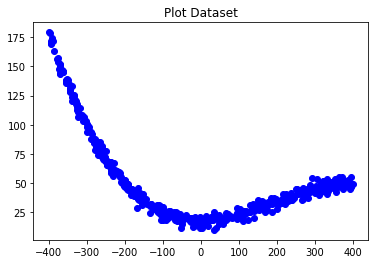

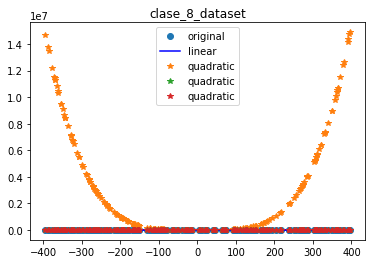

In [142]:
import time
import numpy as np
import matplotlib.pyplot as plt

class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def _build_dataset(self, path):
        structure = [('entrada', np.float),
                     ('salida', np.float)]

        with open(path, encoding="utf8") as data_csv:

            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1])) # add here + 10 in second value
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings

    def split(self, percentage): # 0.8
        X = self.dataset['entrada']
        y = self.dataset['salida']


        permuted_idxs = np.random.permutation(X.shape[0])
 

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]
   

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
   
        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test


class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegression(BaseModel):

    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W

    def predict(self, X):
        return self.model * X
    
class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        return X_expanded.dot(self.model)

class quadratic(BaseModel):

    def fit(self, X, y):
        X_expanded = X 
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = X 
        return self.model * X#return X_expanded.dot(self.model) 
    
class cubic(BaseModel):

    def fit(self, X, y):
        X_expanded = X 
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = X 
        return self.model * X#return X_expanded.dot(self.model) 

class bi_quadratic(BaseModel):

    def fit(self, X, y):
        X_expanded = X 
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = X 
        return self.model * X#return X_expanded.dot(self.model)
    
class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented
    

class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n

    
def k_folds(X_train, y_train, k=2):
    chunk_size = int(len(X_train) / k)
    regression = LinearRegressionWithB()
    quadratic_c= quadratic()
    cubic_c=cubic()
    bi_quadratic_c=bi_quadratic()
    
    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])
              
            
         # linear with b
        regression.fit(new_X_train, new_y_train)
        W_linear = regression.model
        y_linear = W_linear[0]*new_X_train + W_linear[1]
            #error de validacion para el modelo lineal
        error_valid_linear = MSE()
        mse_list_valid_linear = []
        prediction_valid_linear = regression.predict(new_X_valid)
        mse_list_valid_linear.append(error(new_y_valid, prediction_valid_linear))
        mean_MSE_valid_linear = np.mean(mse_list_valid_linear)
        #print(mean_MSE_valid_linear)
    
             #error de test para el modelo lineal
        error_test_linear = MSE()
        mse_list_test_linear = []
        prediction_test_linear = regression.predict(X_test)
        mse_list_test_linear.append(error(y_test, prediction_test_linear))
        mean_MSE_test_linear = np.mean(mse_list_test_linear)
        #print(mean_MSE_test_linear)
    
    
        # quadratic
        X_quadratic = np.vstack((np.power(new_X_train, 2), new_X_train, np.ones(len(new_X_train)))).T
        quadratic_c.fit(X_quadratic, new_y_train.reshape(-1,1))#.reshape(-1, 1))
        W_quadratic = quadratic_c.model
        y_quadratic = W_quadratic[0] * np.power(X_quadratic, 2) + W_quadratic[1] * X_quadratic + W_quadratic[2]
        
            #error de validacion para el modelo quadratic
        error_valid_quadratic = MSE()
        mse_list_valid_quadratic = []
        prediction_valid_quadratic = quadratic_c.predict(new_X_valid)
        mse_list_valid_quadratic.append(error(new_y_valid, prediction_valid_quadratic))
        mean_MSE_valid_quadratic = np.mean(mse_list_valid_quadratic)
        #print(mse_list_valid_quadratic)
    
             #error de test para el modelo quadratic
        error_test_quadratic = MSE()
        mse_list_test_quadratic = []
        prediction_test_quadratic = quadratic_c.predict(X_test)
        mse_list_test_quadratic.append(error(y_test, prediction_test_quadratic))
        mean_MSE_test_quadratic = np.mean(mse_list_test_quadratic)
        #print(mse_list_test_quadratic)
    
        # cubic
        X_cubic = np.vstack((np.power(new_X_train, 3), np.power(new_X_train, 2), new_X_train, np.ones(len(new_X_train)))).T
        cubic_c.fit(X_cubic, new_y_train.reshape(-1, 1))
        W_cubic = cubic_c.model
        y_cubic = W_cubic[0] * np.power(X_cubic, 3) + W_cubic[1] * np.power(X_cubic, 2) + W_cubic[2] * X_cubic + W_cubic[3]
    
             #error de validacion para el modelo cubic
        error_valid_cubic = MSE()
        mse_list_valid_cubic = []
        prediction_valid_cubic = cubic_c.predict(new_X_valid)
        mse_list_valid_cubic.append(error(new_y_valid, prediction_valid_cubic))
        mean_MSE_valid_cubic = np.mean(mse_list_valid_cubic)
        #print(mse_list_valid_cubic)
    
             #error de test para el modelo cubic
        error_test_cubic = MSE()
        mse_list_test_cubic = []
        prediction_test_cubic = cubic_c.predict(X_test)
        mse_list_test_cubic.append(error(y_test, prediction_test_cubic))
        mean_MSE_test_cubic = np.mean(mse_list_test_cubic)
        #print(mse_list_test_cubic)
        
        # bi_quadratic
        X_4 = np.vstack((np.power(new_X_train, 4),np.power(new_X_train, 3), np.power(new_X_train, 2), 
                     new_X_train, np.ones(len(new_X_train)))).T
        bi_quadratic_c.fit(X_4, new_y_train.reshape(-1, 1))
        W_4 = bi_quadratic_c.model
        y_4 = W_4[0] * np.power(X_4, 4) + W_4[1] * np.power(X_4, 3)
        +W_4[2] * np.power(X_4, 2) + W_4[3] * X_4 + W_4[4] 
      
              #error de validacion para el modelo bi_quadratic
        error_valid_bi_quadratic = MSE()
        mse_list_valid_bi_quadratic = []
        prediction_valid_bi_quadratic = bi_quadratic_c.predict(new_X_valid)
        mse_list_valid_bi_quadratic.append(error(new_y_valid, prediction_valid_bi_quadratic))
        mean_MSE_valid_bi_quadratic = np.mean(mse_list_valid_bi_quadratic)
        #print(mse_list_valid_bi_quadraticf'error de test para el modelo bi_quadratic')
    
             #error de test para el modelo bi_quadratic
        error_test_bi_quadratic = MSE()
        mse_list_test_bi_quadratic = []
        prediction_test_bi_quadratic = bi_quadratic_c.predict(X_test)
        mse_list_test_bi_quadratic.append(error(y_test, prediction_test_bi_quadratic))
        mean_MSE_test_bi_quadratic = np.mean(mse_list_test_bi_quadratic)
        #print(mse_list_test_bi_quadratic,f'error de test para el modelo bi_quadratic')
        #print('error de test para el modelo bi_quadratic{}'.format(mse_list_test_bi_quadratic))
     # PLOTS
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.gca().set_title('clase_8_dataset')
    
    # original
    plt.plot(new_X_train, new_y_train, 'o', label='original')
        
    # linear
    plt.plot(new_X_train, y_linear, color='b',label='linear')
        
    # quadratic
    plt.plot(new_X_train, y_quadratic, '*',label='quadratic')
        
    # cubic
    #plt.plot(new_X_train, y_cubic, color='b',label='cubic')
        
    # bi_quadratic
    #plt.plot(new_X_train, y_4, color='g',label='bi_quadratic')
    
    plt.legend()
    plt.show()
        
    return new_X_valid,new_y_valid,new_X_train,new_y_train
    
    
if __name__ == '__main__':
    dataset = Data('C:/Users/Dicsys/Downloads/clase_8_dataset.csv')
    
    X_train, X_test, y_train, y_test = dataset.split(0.8)
    
    X_dataset=np.append(X_train,X_test)
    Y_dataset=np.append(y_train,y_test)
    
    plt.title('Plot Dataset')
    plt.scatter(X_dataset,Y_dataset, color='b', label='dataset')
    
    k_folds(X_train,y_train)
    
   
    
    
   
    
   